# Numpy K-Means

In [122]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.datasets import load_iris


In [123]:

def load_data(file = 'iris'):
    if file == 'iris':
        return load_iris().data
    return np.loadtxt(file)


In [124]:
# Euclidian distance between point a and b
def l2_dist(a,b):
    return np.linalg.norm(a-b)

In [160]:
# k -  cluster number
# epsilon - threshold which is the minimum error to be used in the stop condition
# distance - type of distance l1 or l2

# return:
# prototypes - final centroids
# centroids - all iterations centroids
# group - each sample in which group

def kmeans(dataset, k, epsilon=0, distance='l2'):
    # store the centroids for all iterations
    all_centroids = []
    num_samples, num_features = dataset.shape
    # step1 - initialize the centroids
    centroids = dataset[np.random.randint(0,num_samples-1, size=k)]
    
    all_centroids.append(centroids)
    centroids_prev = np.zeros(centroids.shape)
    # store the clusters
    group = np.zeros((num_samples,1))
    
    # we use l2 distance, and you can also use l1 distance(write by youself)
    if distance == 'l2':
        method = l2_dist
    else:
        pass
    
    norm = method(centroids,centroids_prev)
    iteration = 0
    
    # step 2-4:
    while norm > epsilon:
        iteration += 1
        centroids_prev = centroids
        
        # for each sample in the dataset
        for index, sample in enumerate(dataset):
            # dist_vec store the distances between current sample and k centroids
            dist_vec = np.zeros((k,1))
            for index_pro, centroid in enumerate(centroids):
                # calculate the distance between sample and j-th centroids
                dist_vec[index_pro] = method(centroid, sample)
            # find the group which nearest with the sample
            group[index,0] = np.argmin(dist_vec)
        # new centroids
        temp_centroids = np.zeros((k,num_features))
        # for each cluster calculate the new centroid
        for index in range(len(centroids)):
            sample_close = [i for i in range(len(group)) if group[i] == index]
            centroid = np.mean(dataset[sample_close], axis=0)
            temp_centroids[index,:] = centroid
            
        centroids = temp_centroids
        
        norm = method(centroids,centroids_prev)
        
        all_centroids.append(temp_centroids)
        
    distortion = 0
    for i in range(num_samples):
        distortion += l2_dist(dataset[i,:],centroids[int(group[i]),:])
        
    return centroids, all_centroids, group, distortion 

In [188]:

def kplot(dataset, all_centroids, group):
    # color map, you can add any color in the list if k is very large
    colors = ['r','g','b','c',
             'l','o','g']
    
    fig, ax = plt.subplots()
    # plot sample for each group
    for i in range(dataset.shape[0]):
        sample_close = [j for j in range(len(group)) if group[j] == i]
        for index in sample_close:
            ax.plot(dataset[index][0], dataset[index][1], (colors[i] + 'o'))
            
    history_points = []
    # plot the centroids
    for index, centroids in enumerate(all_centroids):
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'kx')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))
                plt.pause(0.8)

<IPython.core.display.Javascript object>


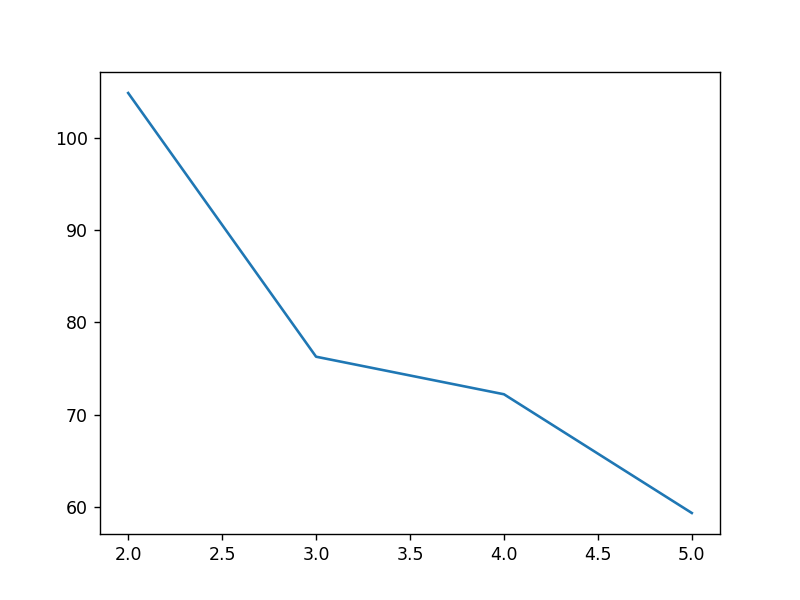

In [193]:
%matplotlib notebook

#load dataset (iris)
dataset = load_data()
dataset = dataset[:,[0,2]]

distortions = []
for k in range(2,6):
    _,_,_,distortion = kmeans(dataset,k)
    distortions.append(distortion)
    
plt.plot(range(2,6),distortions)

(150, 2)


<IPython.core.display.Javascript object>


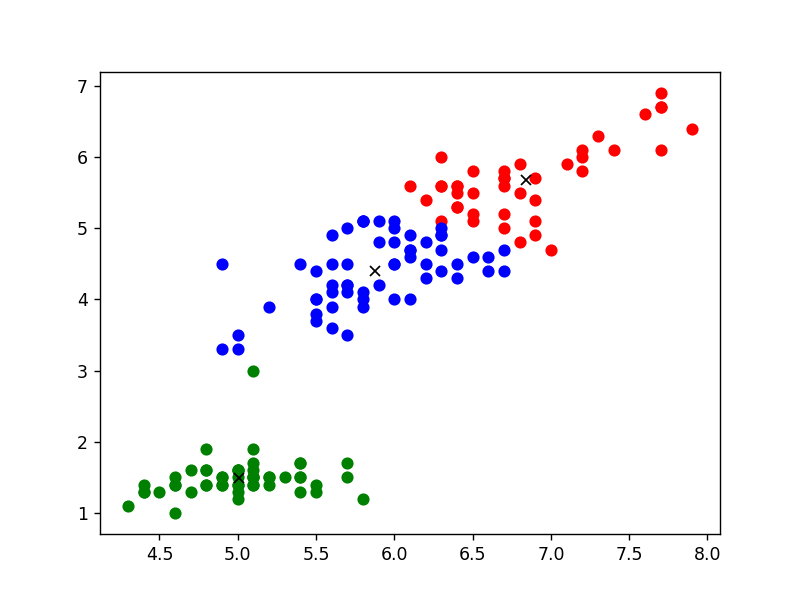

centroids 1 [7.04  5.976]
centroids 1 [5.00784314 1.49215686]
centroids 1 [6.01486486 4.57027027]
centroids 2 [6.92580645 5.87096774]
centroids 2 [5.00784314 1.49215686]
centroids 2 [5.97647059 4.49411765]
centroids 3 [6.86388889 5.78055556]
centroids 3 [5.00784314 1.49215686]
centroids 3 [5.93650794 4.43650794]
centroids 4 [6.85384615 5.71538462]
centroids 4 [5.00784314 1.49215686]
centroids 4 [5.89666667 4.41166667]
centroids 5 [6.8525 5.6925]
centroids 5 [5.00784314 1.49215686]
centroids 5 [5.88135593 4.40508475]
centroids 6 [6.83902439 5.67804878]
centroids 6 [5.00784314 1.49215686]
centroids 6 [5.87413793 4.39310345]
centroids 7 [6.83902439 5.67804878]
centroids 7 [5.00784314 1.49215686]
centroids 7 [5.87413793 4.39310345]


In [194]:
%matplotlib notebook

#load dataset (iris)
dataset = load_data()
dataset = dataset[:,[0,2]]
print(dataset.shape)

#train the model on the data, k=3
centroids, all_centroids, group, _ = kmeans(dataset, 3)

#plot the results
kplot(dataset, all_centroids, group)
